# Results Analysis

## Imports

In [1]:
import os
import pandas as pd
import nibabel as nib
import matplotlib.pyplot as plt
from utils.Transforms import mni_transform
from nilearn.plotting import plot_glass_brain

## Load Data

In [2]:
scores = {}
for model in os.listdir('outputs'):
    if model != 'gt_segmentations':
        scores[model] = {}
        for files in os.listdir(f'outputs/{model}'):
            if files.endswith('metrics.csv'):
                scores[model]['train'] = pd.read_csv(f'outputs/{model}/{files}')
            if files.endswith('scores.csv'):
                scores[model]['test'] = pd.read_csv(f'outputs/{model}/{files}')

SyntaxError: invalid syntax (2480982983.py, line 3)

In [ ]:
scores['AHNet']['train'].head()

,epoch,metric,metric_tc,metric_wt,metric_et,train_loss,val_loss
0,1,0.011330,0.010529,0.009402,0.015561,0.988528,0.990370
1,2,0.012389,0.017673,0.008977,0.011638,0.983636,0.989311
2,3,0.050840,0.126689,0.009666,0.017882,0.968726,0.980261
3,4,0.112131,0.314700,0.008216,0.014920,0.869503,0.968773
4,5,0.119791,0.334669,0.009167,0.017199,0.828164,0.964115


In [ ]:
scores['AHNet']['test'].head()

,SubjectID,Dice,Dice TC,Dice WT,Dice ET,Pred NM TC,Pred NM WT,Pred NM ET,GT NM TC,GT NM WT,...,Pred V ET,GT V TC,GT V WT,GT V ET,Pred TC,Pred WT,Pred ET,GT TC,GT WT,GT ET
0,100214B,0.459820,0.521787,0.526375,0.331299,11,6,9,16,16,...,842,722,722,305,outputs/AHNet/pred_segmentations/pred_100214B_...,outputs/AHNet/pred_segmentations/pred_100214B_...,outputs/AHNet/pred_segmentations/pred_100214B_...,outputs/gt_segmentations/gt_100214B_TC.nii.gz,outputs/gt_segmentations/gt_100214B_WT.nii.gz,outputs/gt_segmentations/gt_100214B_ET.nii.gz
1,100340A,0.273040,0.298055,0.334430,0.186635,5,4,6,8,8,...,837,3847,4138,1692,outputs/AHNet/pred_segmentations/pred_100340A_...,outputs/AHNet/pred_segmentations/pred_100340A_...,outputs/AHNet/pred_segmentations/pred_100340A_...,outputs/gt_segmentations/gt_100340A_TC.nii.gz,outputs/gt_segmentations/gt_100340A_WT.nii.gz,outputs/gt_segmentations/gt_100340A_ET.nii.gz
2,100391A,0.296876,0.312725,0.311971,0.265932,3,3,12,1,1,...,12022,2245,2245,1944,outputs/AHNet/pred_segmentations/pred_100391A_...,outputs/AHNet/pred_segmentations/pred_100391A_...,outputs/AHNet/pred_segmentations/pred_100391A_...,outputs/gt_segmentations/gt_100391A_TC.nii.gz,outputs/gt_segmentations/gt_100391A_WT.nii.gz,outputs/gt_segmentations/gt_100391A_ET.nii.gz
3,100190B,0.664776,0.688608,0.689713,0.616008,1,1,1,2,2,...,472,694,694,515,outputs/AHNet/pred_segmentations/pred_100190B_...,outputs/AHNet/pred_segmentations/pred_100190B_...,outputs/AHNet/pred_segmentations/pred_100190B_...,outputs/gt_segmentations/gt_100190B_TC.nii.gz,outputs/gt_segmentations/gt_100190B_WT.nii.gz,outputs/gt_segmentations/gt_100190B_ET.nii.gz
4,100142A,0.583799,0.621268,0.626341,0.503786,5,3,49,2,2,...,3191,2091,2091,1299,outputs/AHNet/pred_segmentations/pred_100142A_...,outputs/AHNet/pred_segmentations/pred_100142A_...,outputs/AHNet/pred_segmentations/pred_100142A_...,outputs/gt_segmentations/gt_100142A_TC.nii.gz,outputs/gt_segmentations/gt_100142A_WT.nii.gz,outputs/gt_segmentations/gt_100142A_ET.nii.gz


In [ ]:
# Print Hight and lowest mean dice and Subject ID
for i, model in enumerate(scores.keys()):

        min_id = scores[model]['test'][f'Dice'].idxmin()
        min_sub = scores[model]['test'].iloc[min_id]['SubjectID']

        max_id = scores[model]['test'][f'Dice'].idxmax()
        max_sub = scores[model]['test'].iloc[max_id]['SubjectID']

        id_1 = 1
        sub_1 = scores[model]['test'].iloc[id_1]['SubjectID']

        id_2 = 3
        sub_2 = scores[model]['test'].iloc[id_2]['SubjectID']		

        print(f"Model: {model}\n"
              f"  Lowest Mean Dice: {scores[model]['test'].iloc[min_id]['Dice']} - Subject ID: {min_sub}\n"
              f"  Highest Mean Dice: {scores[model]['test'].iloc[max_id]['Dice']} - Subject ID: {max_sub}\n"
              f"  Rand 1: {scores[model]['test'].iloc[id_1]['Dice']} - Subject ID: {sub_1}\n"
              f"  Rand 2: {scores[model]['test'].iloc[id_2]['Dice']} - Subject ID: {sub_2}\n"
              f"-----------------------------------------")

Model: AHNet

Model: AHNet
  Lowest Mean Dice: 0.0 - Subject ID: 100162A
  Highest Mean Dice: 0.93092542886734 - Subject ID: 100288A
  Rand 1: 0.2730401158332824 - Subject ID: 100340A
  Rand 2: 0.6647763252258301 - Subject ID: 100190B
-----------------------------------------
Model: gt_segmentations



KeyError: 'test'

In [ ]:
# Params
wrost_pred = '100162A'
best_pred = '100288A'
rand_1 = '100340A'
rand_2 = '100190B'
channels = ['TC', 'WT', 'ET']
worst_images = {'GT': [], 'AHNet': [], 'SegResNet': [], 'UNet': [], 'UNETR': []}
best_images = {'GT': [], 'AHNet': [], 'SegResNet': [], 'UNet': [], 'UNETR': []}
rand_1_images = {'GT': [], 'AHNet': [], 'SegResNet': [], 'UNet': [], 'UNETR': []}
rand_2_images = {'GT': [], 'AHNet': [], 'SegResNet': [], 'UNet': [], 'UNETR': []}

# Load worst
for channel in channels:
	for model in worst_images.keys():
		img = None
		if model == 'GT':
			img = mni_transform(nib.load(scores['AHNet']['test'][scores['AHNet']['test']['SubjectID'] == wrost_pred][f'GT {channel}'].values[0]))
		else:
			img = mni_transform(nib.load(scores[model]['test'][scores[model]['test']['SubjectID'] == wrost_pred][f'Pred {channel}'].values[0]))
		worst_images[model].append(img)

# Load best
for channel in channels:
	for model in best_images.keys():
		if model == 'GT':
			img = mni_transform(nib.load(scores['AHNet']['test'][scores['AHNet']['test']['SubjectID'] == best_pred][f'GT {channel}'].values[0]))
		else:
			img = mni_transform(nib.load(scores[model]['test'][scores[model]['test']['SubjectID'] == best_pred][f'Pred {channel}'].values[0]))
		best_images[model].append(img)

# Load rand 1
for channel in channels:
	for model in rand_1_images.keys():
		if model == 'GT':
			img = mni_transform(nib.load(scores['AHNet']['test'][scores['AHNet']['test']['SubjectID'] == rand_1][f'GT {channel}'].values[0]))
		else:
			img = mni_transform(nib.load(scores[model]['test'][scores[model]['test']['SubjectID'] == rand_1][f'Pred {channel}'].values[0]))
		rand_1_images[model].append(img)

# Load rand 2
for channel in channels:
	for model in rand_2_images.keys():
		if model == 'GT':
			img = mni_transform(nib.load(scores['AHNet']['test'][scores['AHNet']['test']['SubjectID'] == rand_2][f'GT {channel}'].values[0]))
		else:
			img = mni_transform(nib.load(scores[model]['test'][scores[model]['test']['SubjectID'] == rand_2][f'Pred {channel}'].values[0]))
		rand_2_images[model].append(img)

## Train & Val Loss

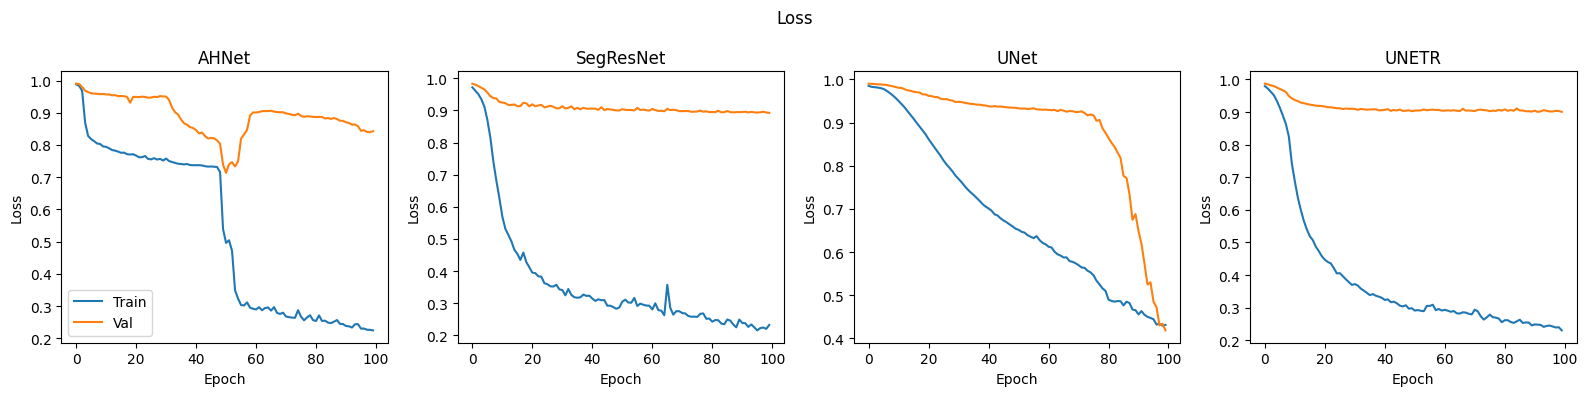

In [ ]:
plt.figure(figsize=(16, 4))

for i, model in enumerate(scores.keys()):

	# Load scores
	sc = scores[model]['train']

	# Plot
	plt.subplot(1, len(scores), i+1)
	plt.plot(sc["train_loss"], label='Train')
	plt.plot(sc["val_loss"], label='Val')
	plt.title(model)
	plt.xlabel("Epoch")
	plt.ylabel("Loss")
	if i == 0:
		plt.legend()

plt.suptitle("Loss")
plt.tight_layout()
plt.show()

## Validation Dice Score

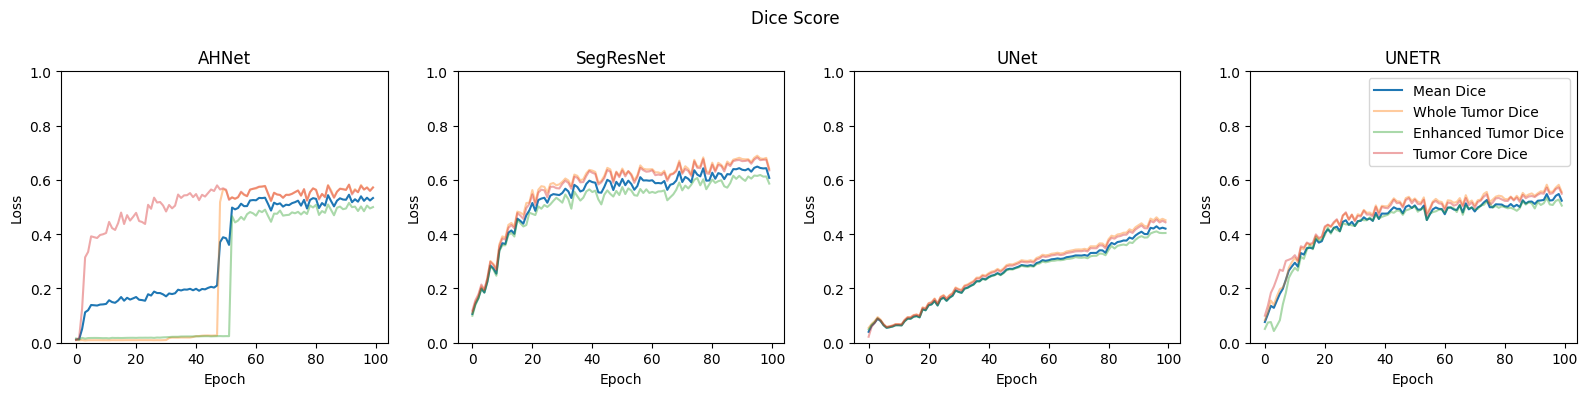

In [ ]:
plt.figure(figsize=(16, 4))

for i, model in enumerate(scores.keys()):
	
	# Load scores
	sc = scores[model]['train']

	# Plots
	plt.subplot(1, len(scores), i+1)
	plt.plot(sc["metric"], label='Mean Dice')
	plt.plot(sc["metric_wt"], label='Whole Tumor Dice', alpha=0.4)
	plt.plot(sc["metric_et"], label='Enhanced Tumor Dice', alpha=0.4)
	plt.plot(sc["metric_tc"], label='Tumor Core Dice', alpha=0.4)
	plt.title(model)
	plt.xlabel("Epoch")
	plt.ylabel("Loss")
	plt.ylim(0, 1)
	if i == 3:
		plt.legend()

plt.suptitle("Dice Score")
plt.tight_layout()
plt.show()

## Test Dice Score Analysis

### Mean Dice

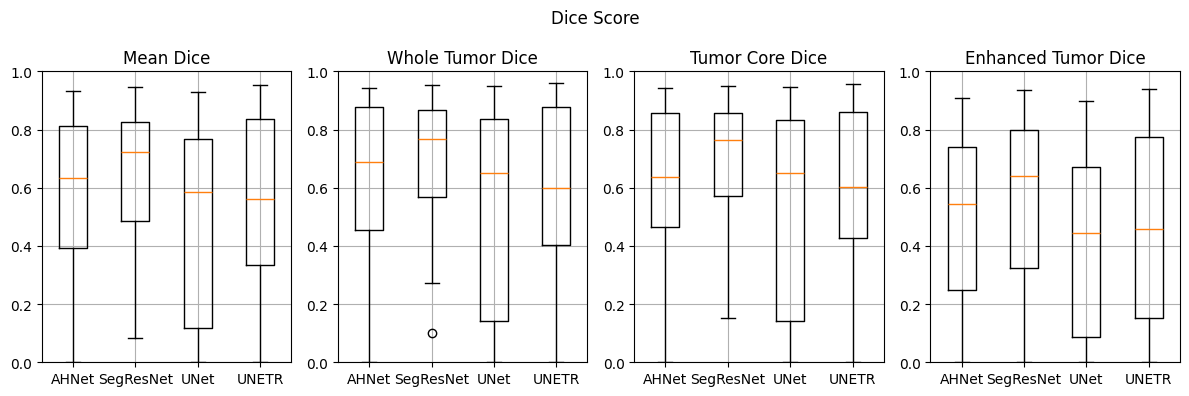

In [ ]:
plt.figure(figsize=(12, 4))

mean, wt, tc, et = [], [], [], []
for i, model in enumerate(scores.keys()):
	# Load scores
	sc = scores[model]['test']
	mean.append(sc["Dice"])
	wt.append(sc["Dice WT"])
	tc.append(sc["Dice TC"])
	et.append(sc["Dice ET"])

plt.subplot(1, 4, 1)
plt.boxplot(mean, labels=scores.keys())
plt.title("Mean Dice")
plt.ylim(0, 1)
plt.grid()

plt.subplot(1, 4, 2)
plt.boxplot(wt, labels=scores.keys())
plt.title("Whole Tumor Dice")
plt.ylim(0, 1)	
plt.grid()

plt.subplot(1, 4, 3)
plt.boxplot(tc, labels=scores.keys())
plt.title("Tumor Core Dice")
plt.ylim(0, 1)
plt.grid()

plt.subplot(1, 4, 4)
plt.boxplot(et, labels=scores.keys())
plt.title("Enhanced Tumor Dice")
plt.ylim(0, 1)
plt.grid()

plt.suptitle("Dice Score")
plt.tight_layout()
plt.show()

### TC, WT, ET Dice

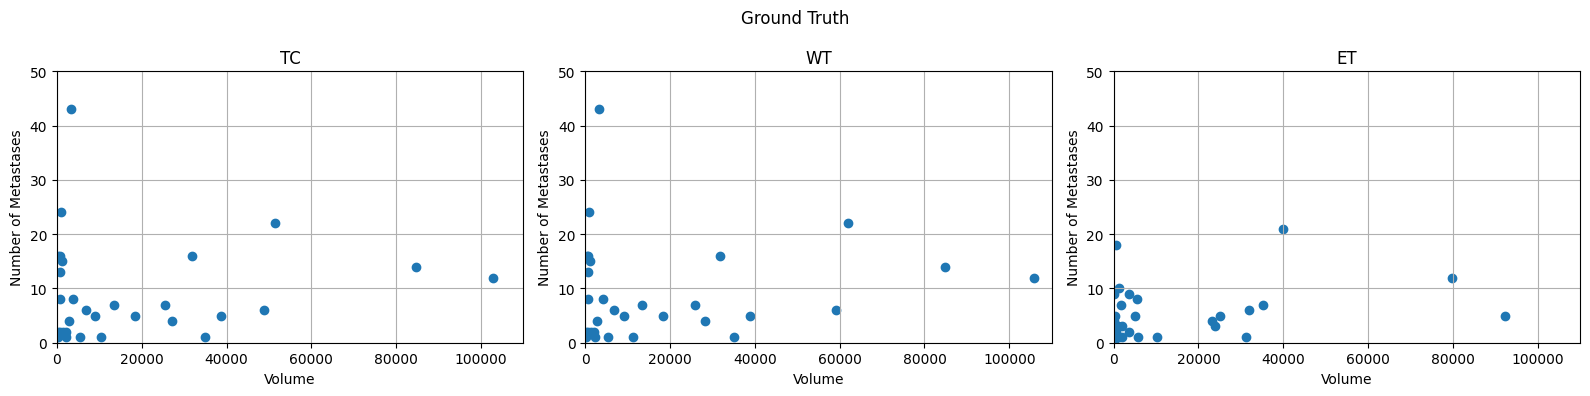

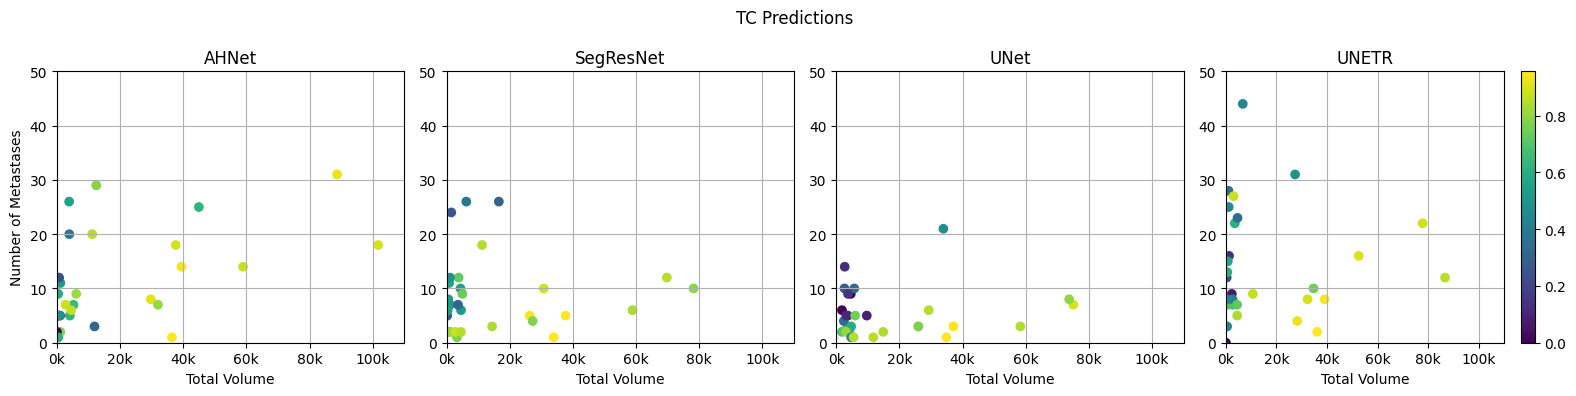

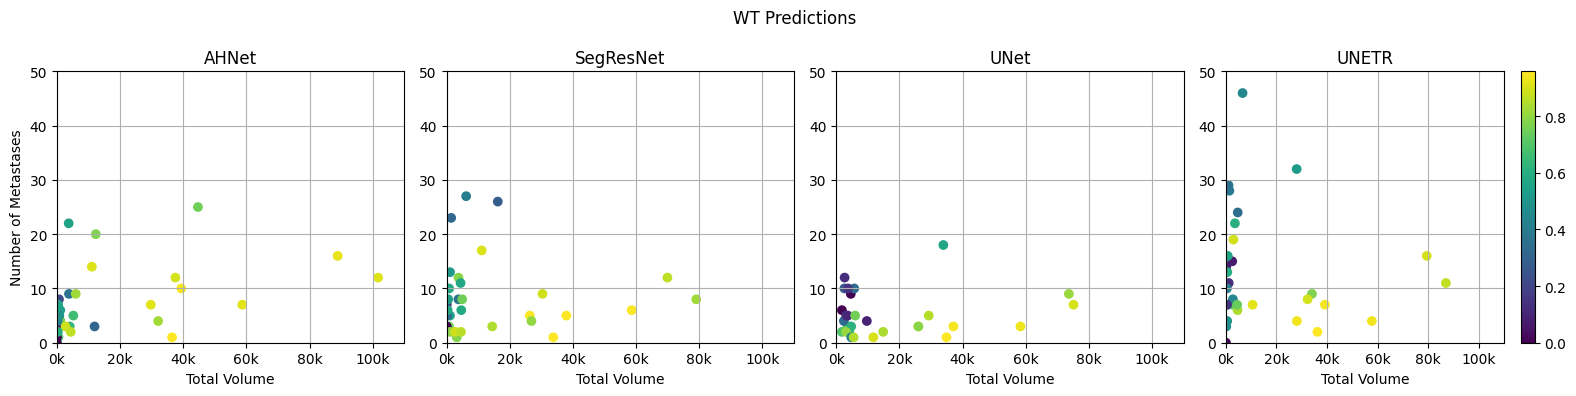

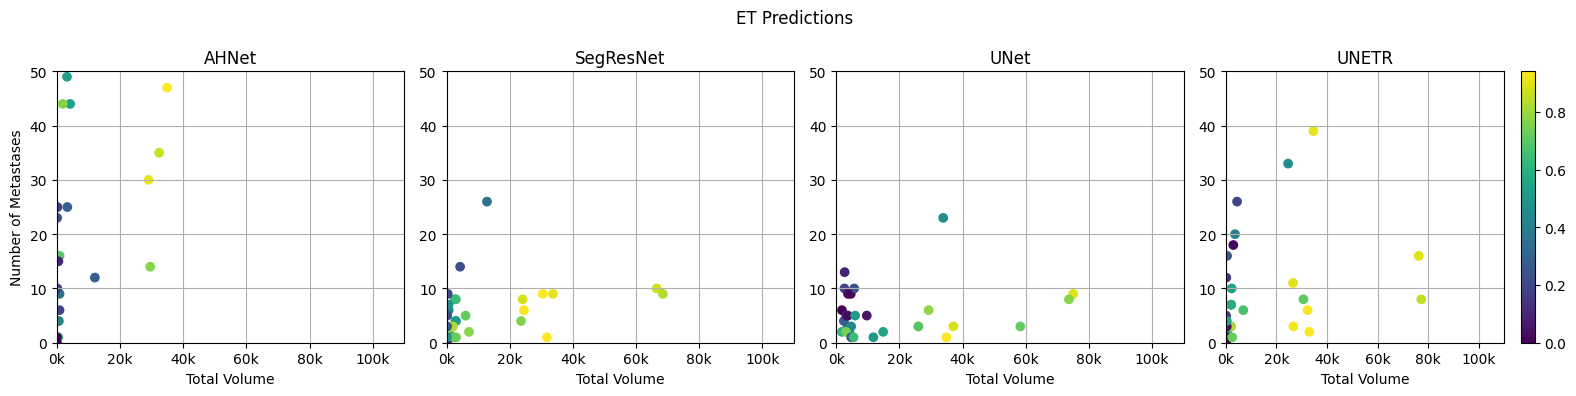

In [ ]:
# Scatter Based on NM and V

# GT 
plt.figure(figsize=(16, 4))
for i, channel in enumerate(channels):
	plt.subplot(1, 3, i+1)
	plt.scatter(scores['AHNet']['test'][f'GT V {channel}'], scores['AHNet']['test'][f'GT NM {channel}'])
	plt.title(channel)
	plt.xlabel("Volume")
	plt.ylabel("Number of Metastases")
	plt.xlim(0, 110000)
	plt.ylim(0, 50)
	plt.grid()
plt.suptitle("Ground Truth")
plt.tight_layout()
plt.show()

# Predicted
for channel in channels:
	plt.figure(figsize=(16, 4))
	for i, model in enumerate(scores.keys()):
		plt.subplot(1, len(scores), i+1)
		plt.scatter(scores[model]['test'][f'Pred V {channel}'], scores[model]['test'][f'Pred NM {channel}'], c=scores[model]['test'][f'Dice {channel}'])
		plt.title(model)
		plt.xlabel("Total Volume")
		plt.xlim(0, 110000)
		plt.xticks([0, 20000, 40000, 60000, 80000, 100000], 
           ['{}k'.format(int(x/1000)) for x in [0, 20000, 40000, 60000, 80000, 100000]])
		plt.ylim(0, 50)
		plt.grid()
		if i == 0:
			plt.ylabel("Number of Metastases")
		if i == 3:
			plt.colorbar()
	plt.suptitle(f"{channel} Predictions")
	plt.tight_layout()
	plt.show()

## Crystal Brain Plots

### Worst Prediction

In [ ]:
# Worst Dice
print(f"Worst Dice: {scores['AHNet']['test'][scores['AHNet']['test']['SubjectID'] == wrost_pred]['Dice'].values[0]}")

Worst Dice: 0.0


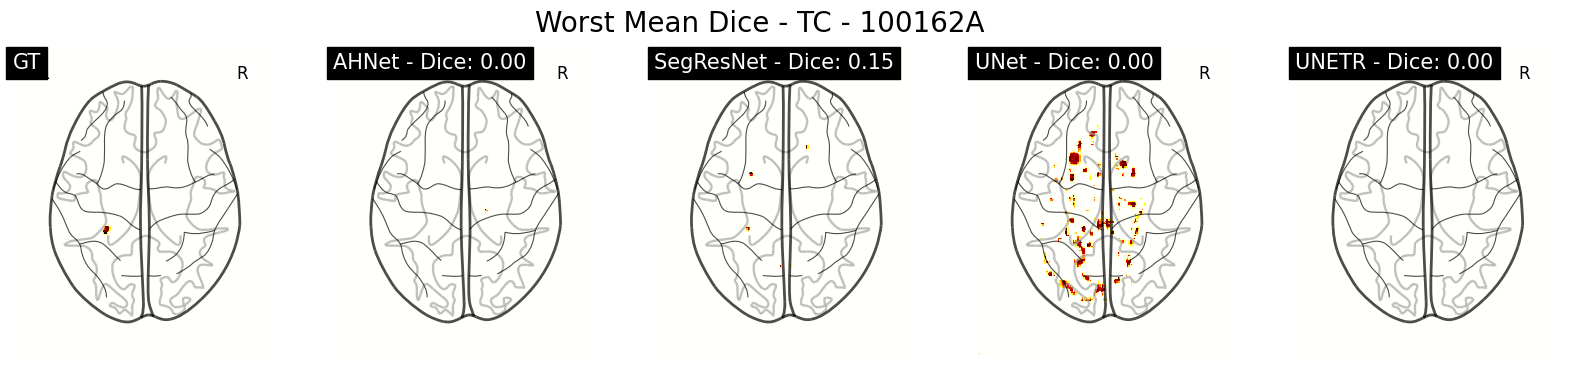

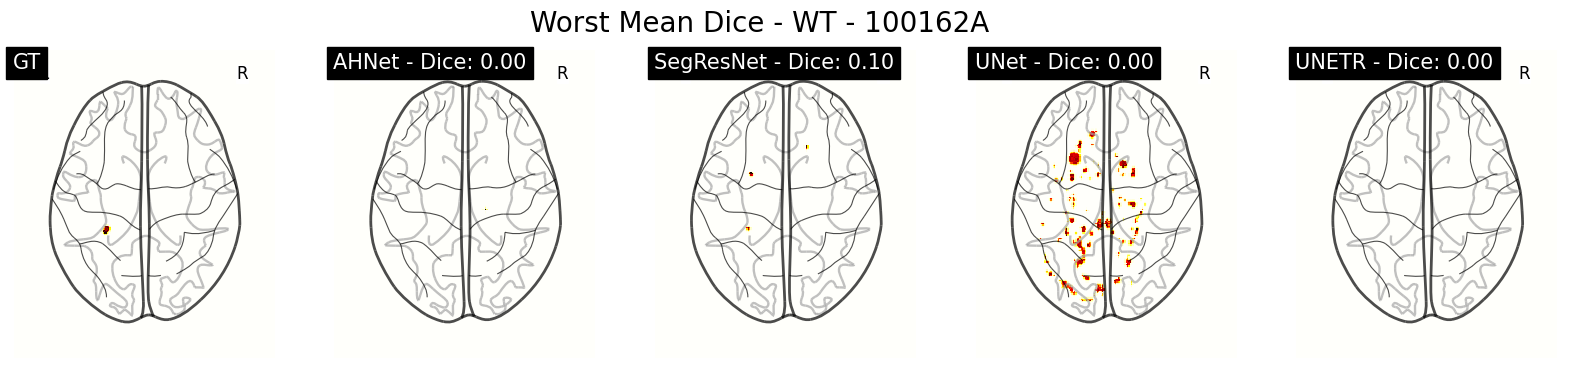

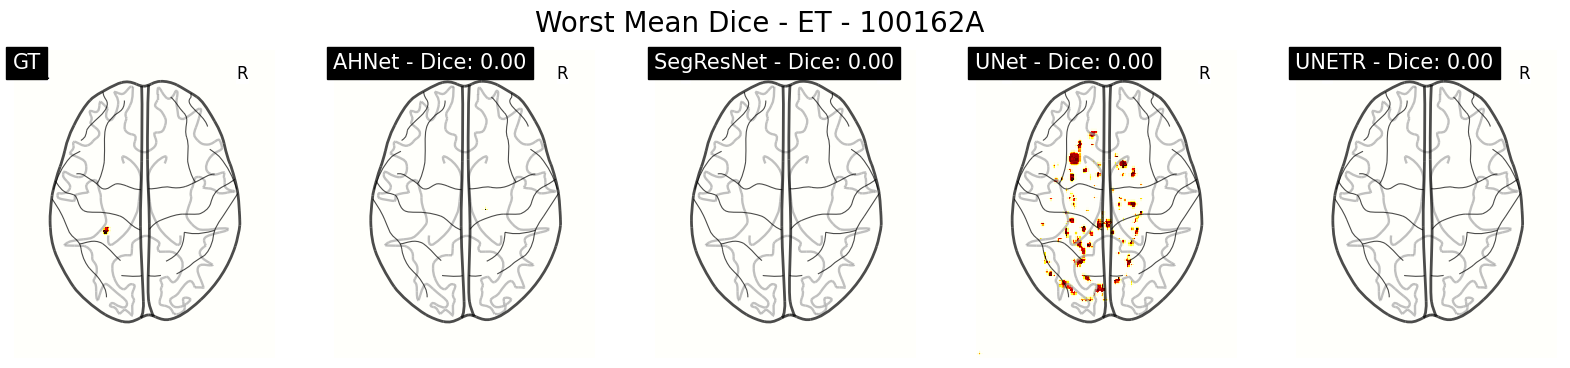

In [ ]:
# Plot
for i, channel in enumerate(channels):
	fig, axes = plt.subplots(1, 5, figsize=(20, 4))
	for j, model in enumerate(worst_images.keys()):
		if model == 'GT':
			plot_glass_brain(worst_images[model][i], axes=axes[j], title=f"{model}", display_mode='z')
		else:
			score = scores[model]['test'][scores[model]['test']['SubjectID'] == wrost_pred][f'Dice {channel}'].values[0]
			plot_glass_brain(worst_images[model][i], axes=axes[j], title=f"{model} - Dice: {score:.2f}", display_mode='z')
	plt.suptitle(f"Worst Mean Dice - {channel} - {wrost_pred}", fontsize=20)
	plt.show()

### Best Prediction

In [ ]:
# Best Dice
print(f"Best Dice - Subject ID: {best_pred}\n"
      f"   AHNet: {scores['AHNet']['test'][scores['AHNet']['test']['SubjectID'] == best_pred]['Dice'].values[0]}\n"
      f"   SegResNet: {scores['SegResNet']['test'][scores['SegResNet']['test']['SubjectID'] == best_pred]['Dice'].values[0]}\n"
      f"   UNet: {scores['UNet']['test'][scores['UNet']['test']['SubjectID'] == best_pred]['Dice'].values[0]}\n"
      f"   UNETR: {scores['UNETR']['test'][scores['UNETR']['test']['SubjectID'] == best_pred]['Dice'].values[0]}")

Best Dice - Subject ID: 100288A
   AHNet: 0.93092542886734
   SegResNet: 0.9452023506164552
   UNet: 0.9300248622894288
   UNETR: 0.9515849947929382


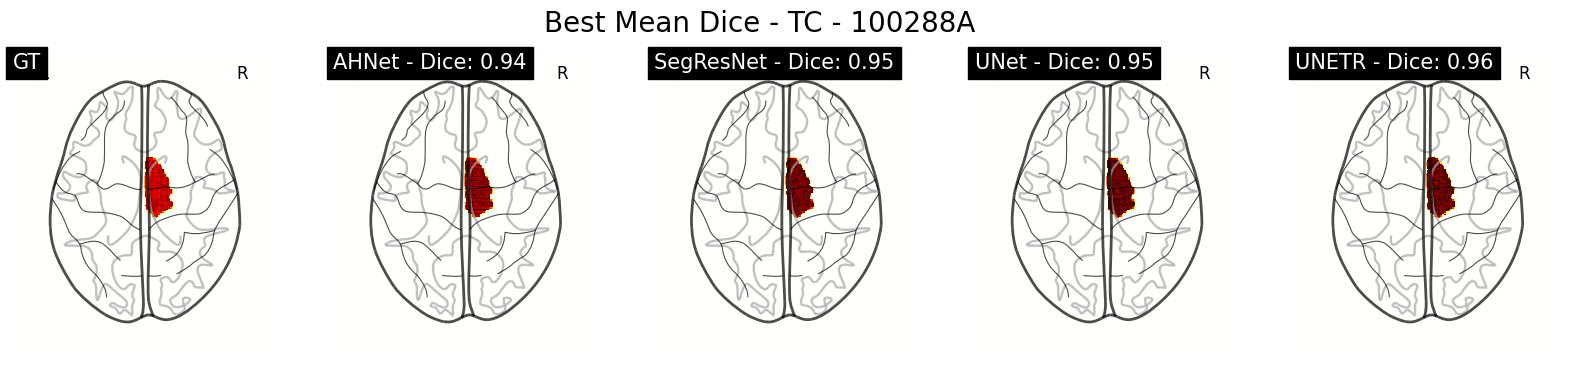

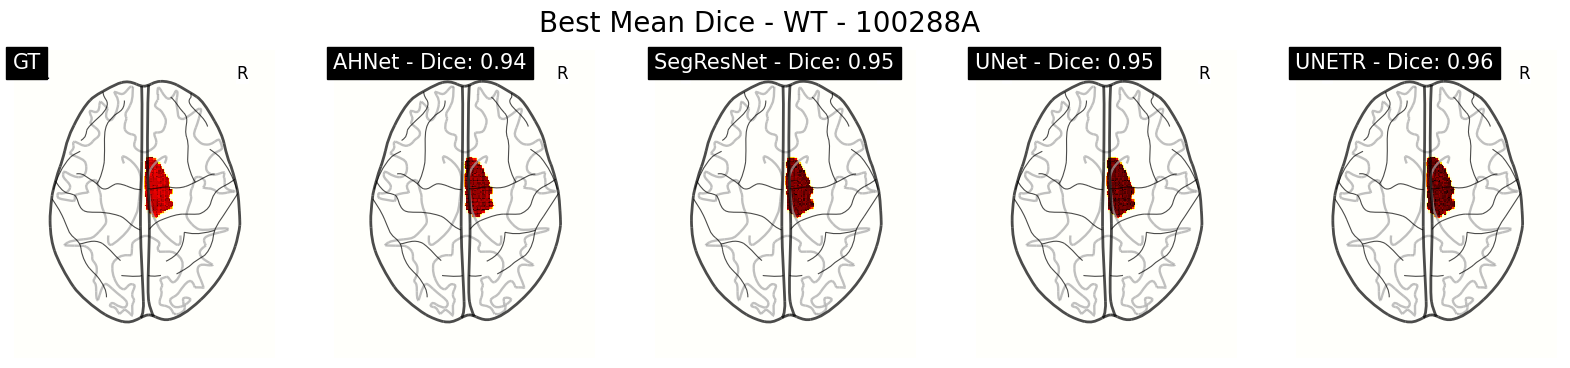

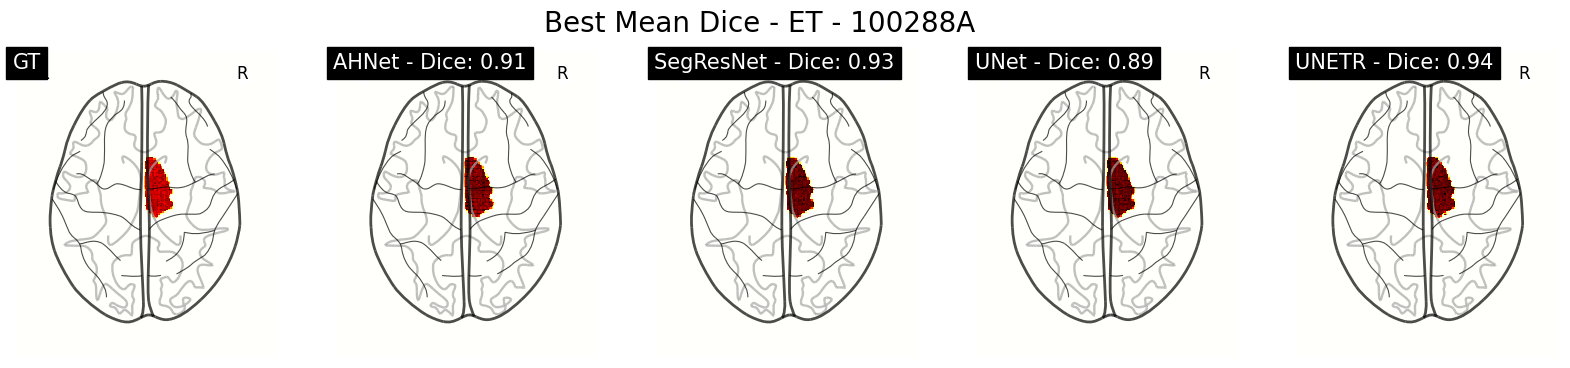

In [ ]:
# Plot
for i, channel in enumerate(channels):
	fig, axes = plt.subplots(1, 5, figsize=(20, 4))
	for j, model in enumerate(best_images.keys()):
		if model == 'GT':
			plot_glass_brain(best_images[model][i], axes=axes[j], title=f"{model}", display_mode='z')
		else:
			score = scores[model]['test'][scores[model]['test']['SubjectID'] == best_pred][f'Dice {channel}'].values[0]
			plot_glass_brain(best_images[model][i], axes=axes[j], title=f"{model} - Dice: {score:.2f}", display_mode='z')
	plt.suptitle(f"Best Mean Dice - {channel} - {best_pred}", fontsize=20)
	plt.show()

### Random Subject 1

In [ ]:
# Rand 1 Dice
print(f"Rand 1 Dice - Subject ID: {rand_1}\n"
	  f"   AHNet: {scores['AHNet']['test'][scores['AHNet']['test']['SubjectID'] == rand_1]['Dice'].values[0]}\n"
	  f"   SegResNet: {scores['SegResNet']['test'][scores['SegResNet']['test']['SubjectID'] == rand_1]['Dice'].values[0]}\n"
	  f"   UNet: {scores['UNet']['test'][scores['UNet']['test']['SubjectID'] == rand_1]['Dice'].values[0]}\n"
	  f"   UNETR: {scores['UNETR']['test'][scores['UNETR']['test']['SubjectID'] == rand_1]['Dice'].values[0]}")

Rand 1 Dice - Subject ID: 100340A
   AHNet: 0.2730401158332824
   SegResNet: 0.6917755007743835
   UNet: 0.5916224122047424
   UNETR: 0.5624508261680603


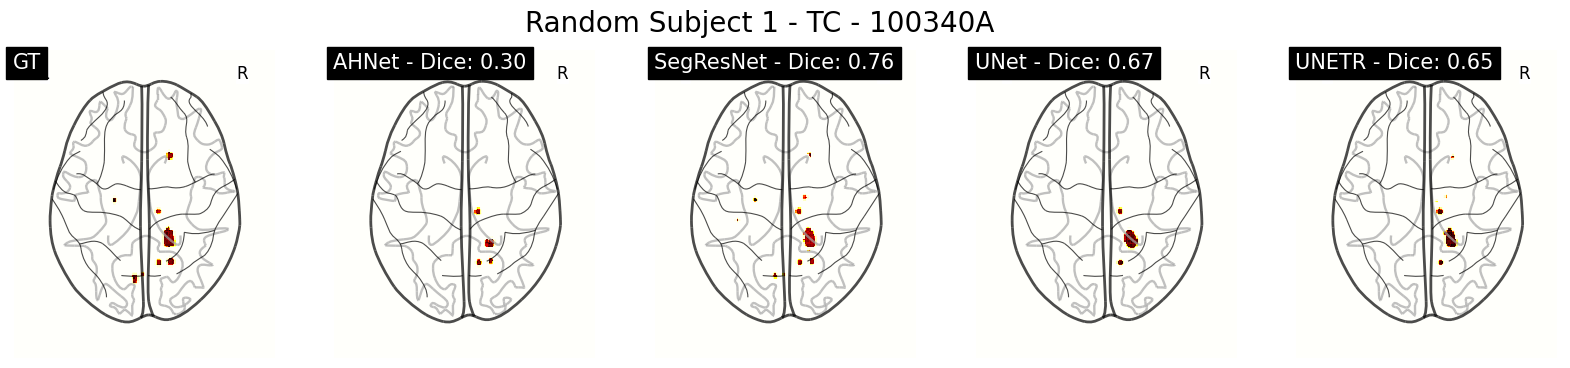

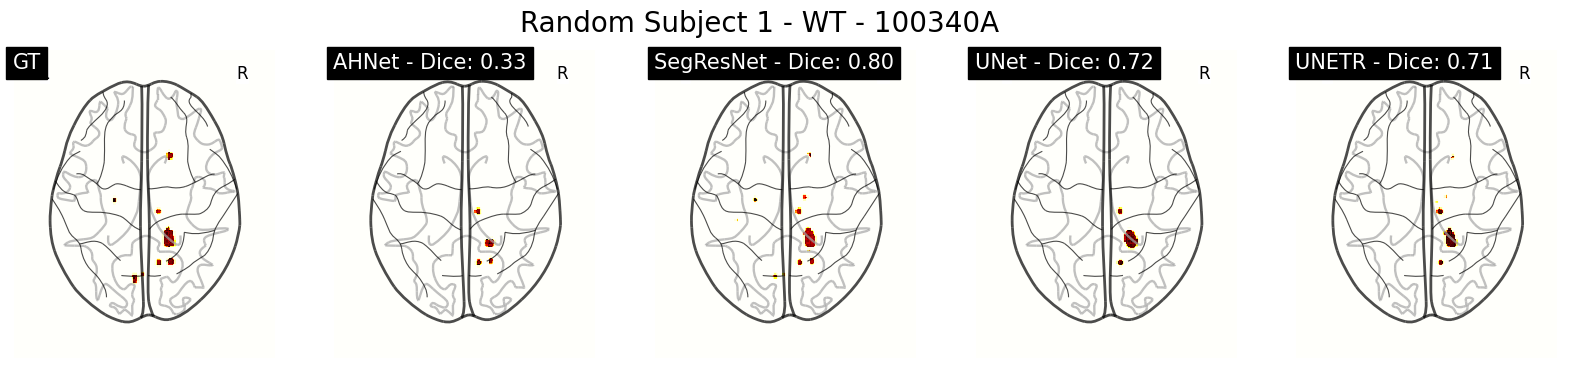

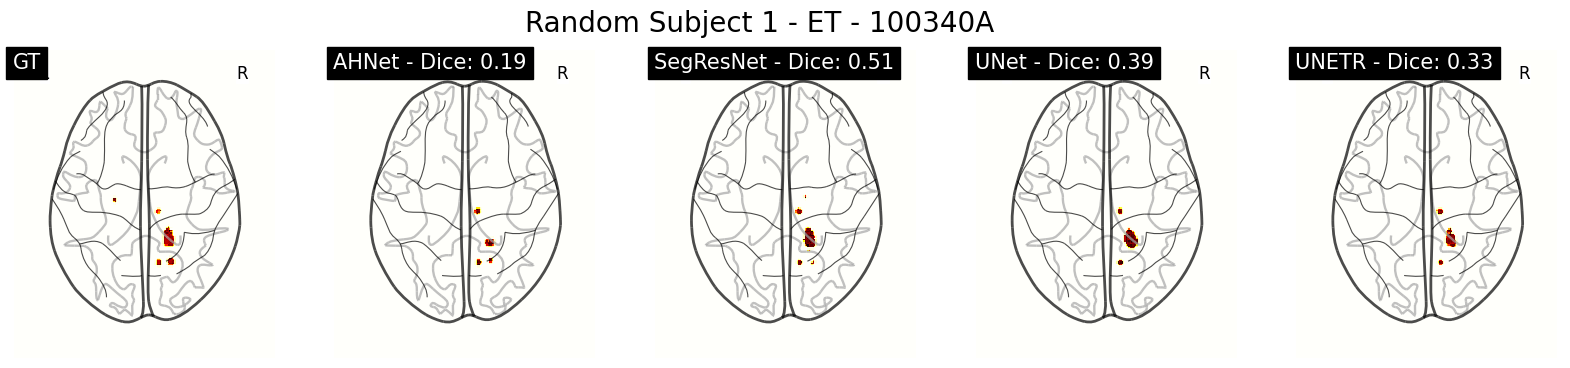

In [ ]:
# Plot
for i, channel in enumerate(channels):
	fig, axes = plt.subplots(1, 5, figsize=(20, 4))
	for j, model in enumerate(rand_1_images.keys()):
		if model == 'GT':
			plot_glass_brain(rand_1_images[model][i], axes=axes[j], title=f"{model}", display_mode='z')
		else:
			score = scores[model]['test'][scores[model]['test']['SubjectID'] == rand_1][f'Dice {channel}'].values[0]
			plot_glass_brain(rand_1_images[model][i], axes=axes[j], title=f"{model} - Dice: {score:.2f}", display_mode='z')
	plt.suptitle(f"Random Subject 1 - {channel} - {rand_1}", fontsize=20)
	plt.show()

### Random Subject 2

In [ ]:
# Rand 2 Dice
print(f"Rand 2 Dice - Subject ID: {rand_2}\n"
	  f"   AHNet: {scores['AHNet']['test'][scores['AHNet']['test']['SubjectID'] == rand_2]['Dice'].values[0]}\n"
	  f"   SegResNet: {scores['SegResNet']['test'][scores['SegResNet']['test']['SubjectID'] == rand_2]['Dice'].values[0]}\n"
	  f"   UNet: {scores['UNet']['test'][scores['UNet']['test']['SubjectID'] == rand_2]['Dice'].values[0]}\n"
	  f"   UNETR: {scores['UNETR']['test'][scores['UNETR']['test']['SubjectID'] == rand_2]['Dice'].values[0]}")

Rand 2 Dice - Subject ID: 100190B
   AHNet: 0.6647763252258301
   SegResNet: 0.7365744709968567
   UNet: 0.3013451397418976
   UNETR: 0.6488892436027527


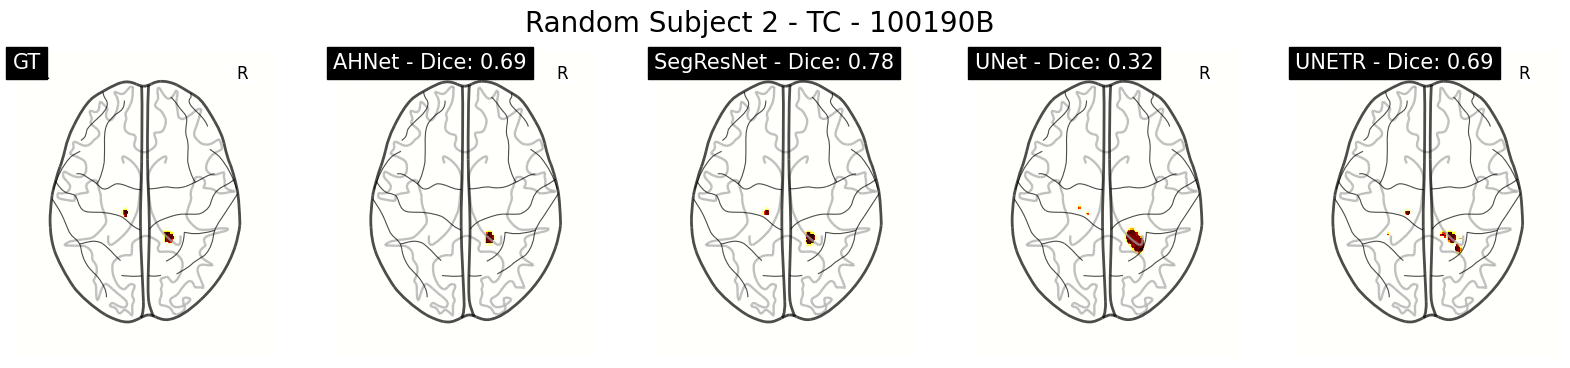

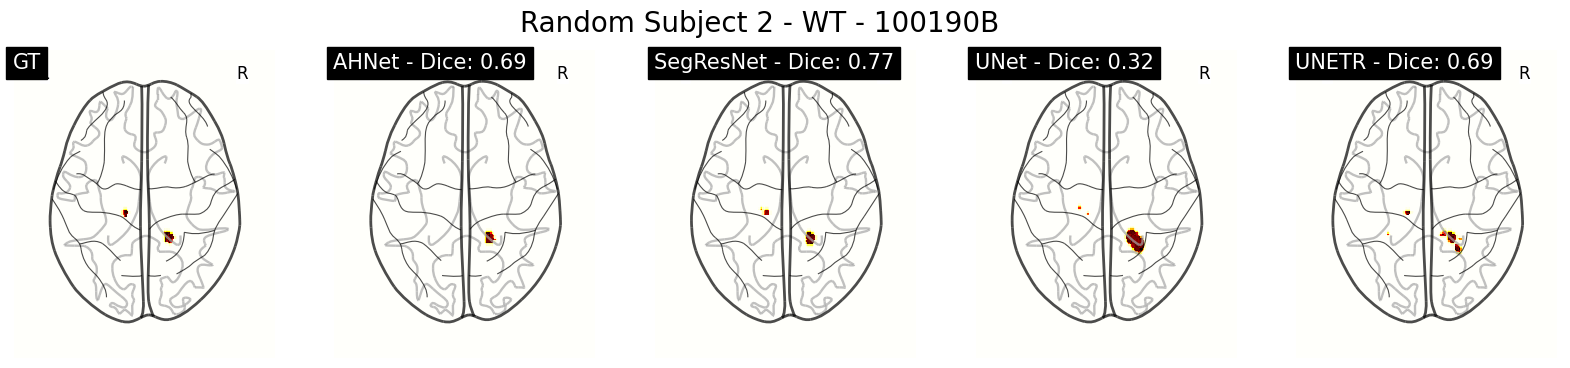

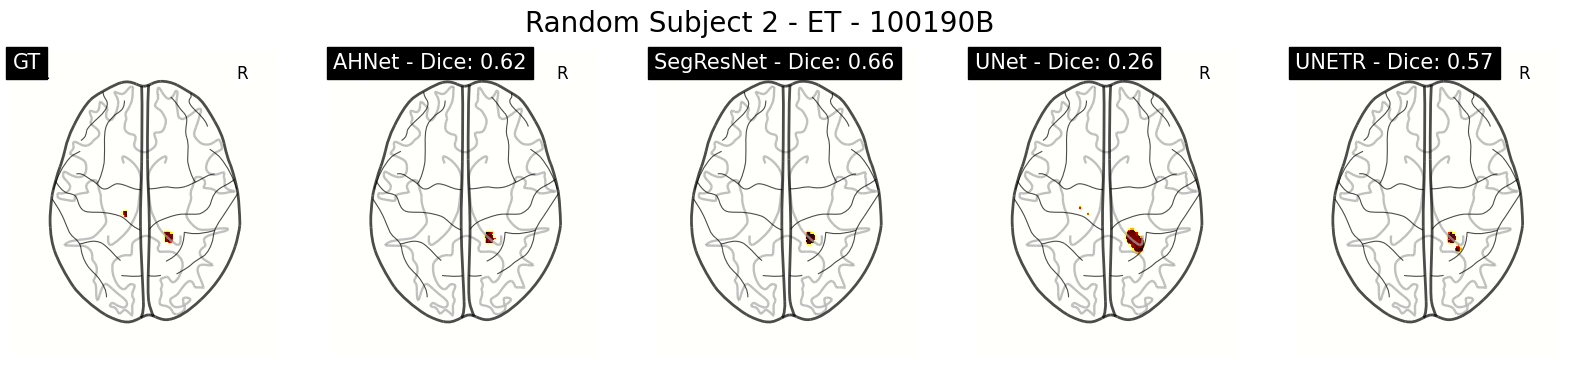

In [ ]:
# Plot
for i, channel in enumerate(channels):
	fig, axes = plt.subplots(1, 5, figsize=(20, 4))
	for j, model in enumerate(rand_2_images.keys()):
		if model == 'GT':
			plot_glass_brain(rand_2_images[model][i], axes=axes[j], title=f"{model}", display_mode='z')
		else:
			score = scores[model]['test'][scores[model]['test']['SubjectID'] == rand_2][f'Dice {channel}'].values[0]
			plot_glass_brain(rand_2_images[model][i], axes=axes[j], title=f"{model} - Dice: {score:.2f}", display_mode='z')
	plt.suptitle(f"Random Subject 2 - {channel} - {rand_2}", fontsize=20)
	plt.show()